<a href="https://colab.research.google.com/github/Aries1975/tibaml0315/blob/main/mnist_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from keras import XXX
-> from tensorflow.keras import XXX


In [17]:
from  tensorflow.keras.datasets import mnist
#((x_train, y_train), (x_test, y_test))
((x_train, y_train), (x_test, y_test))=mnist.load_data()

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


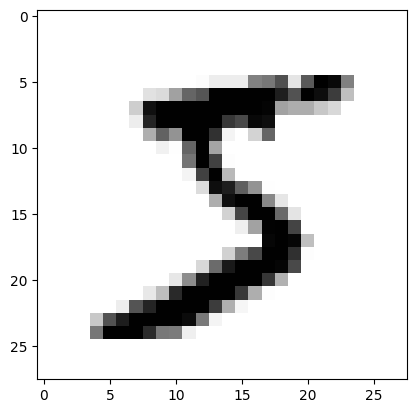

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray_r")

In [20]:
# models(地基): Sequential(一層疊一層) Model(自由疊層)
# layers: Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="sigmoid", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="sigmoid")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
# model.compile(loss="mse", metrics=["accuracy"])
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [22]:
# y
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
# tensorflow隨機的weight有配合
# reshape你可以把一個位置替換成-1(讓他自己算)
# x_train.reshape(60000, 784)
x_train_norm = x_train.reshape(-1, 784)
x_test_norm = x_test.reshape(-1, 784)
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [24]:
# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=40,
     validation_split=0.1)


Epoch 1/40
540/540 [==============================] - 4s 6ms/step - loss: 0.5362 - accuracy: 0.8515 - val_loss: 0.2631 - val_accuracy: 0.9250
Epoch 2/40
540/540 [==============================] - 2s 5ms/step - loss: 0.2878 - accuracy: 0.9145 - val_loss: 0.2146 - val_accuracy: 0.9338
Epoch 3/40
540/540 [==============================] - 3s 5ms/step - loss: 0.2463 - accuracy: 0.9257 - val_loss: 0.1878 - val_accuracy: 0.9462
Epoch 4/40
540/540 [==============================] - 3s 5ms/step - loss: 0.2244 - accuracy: 0.9325 - val_loss: 0.1764 - val_accuracy: 0.9480
Epoch 5/40
540/540 [==============================] - 4s 7ms/step - loss: 0.2063 - accuracy: 0.9375 - val_loss: 0.1645 - val_accuracy: 0.9520
Epoch 6/40
540/540 [==============================] - 3s 5ms/step - loss: 0.1923 - accuracy: 0.9416 - val_loss: 0.1618 - val_accuracy: 0.9552
Epoch 7/40
540/540 [==============================] - 2s 4ms/step - loss: 0.1836 - accuracy: 0.9446 - val_loss: 0.1552 - val_accuracy: 0.9570
Epoch 